##### Lecture 19: Partial Differential Equations - Hyperbolic

1. 1-D Wave equation

$$\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}$$


$x \in [0,1]$, $t \in [0,5]$ seconds. Use $\Delta x = 0.01$ cm and $\Delta t = 0.005$ s with $c = 1$.

Boundary conditions: $u(0,t) = 0$, $u(1,t) = 0$

Initial conditions: $u(x,0) = \sin(n\pi/L)$,  $n=1,2,3...$

And $\frac{\partial u}{\partial t}(x,0) = 0$

Solve with explicit FDM, then solve again with Neumann BCs: $\frac{\partial u}{\partial x} = 0$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

In [2]:
dx = 0.01 
dt = 0.005
L = 1
tmax = 5
c = 1
C = c*dt/dx # Courant number, <=1 for stability
print(C)

x = np.arange(0, L+dx, dx)
t = np.arange(0, tmax+dt, dt)
u = np.zeros((len(x), len(t)))

n = 1 # initial condition sin(n*pi/L)
u[:,0] = np.sin(n*np.pi*x/L)

# first timestep - zero velocity condition
for i in range(1, len(x)-1):
    u[i,1] = u[i,0] - 0.5 * C**2 * (u[i+1,0] - 2*u[i,0] + u[i-1,0])

# explicit solution over all remaining timesteps
for k in range(1, len(t)-1):
    for i in range(1,len(x)-1):
        u[i,k+1] = -u[i,k-1] + 2*u[i,k] + \
                    C**2 * (u[i+1,k] - 2*u[i,k] + u[i-1,k])
    
    u[0,k+1] = 0 # BCs=0 should still be met, but assign anyway
    u[-1,k+1] = 0

0.5


To see the results $u(x,t)$, let's create a function that updates the plot every `interval` frames. 

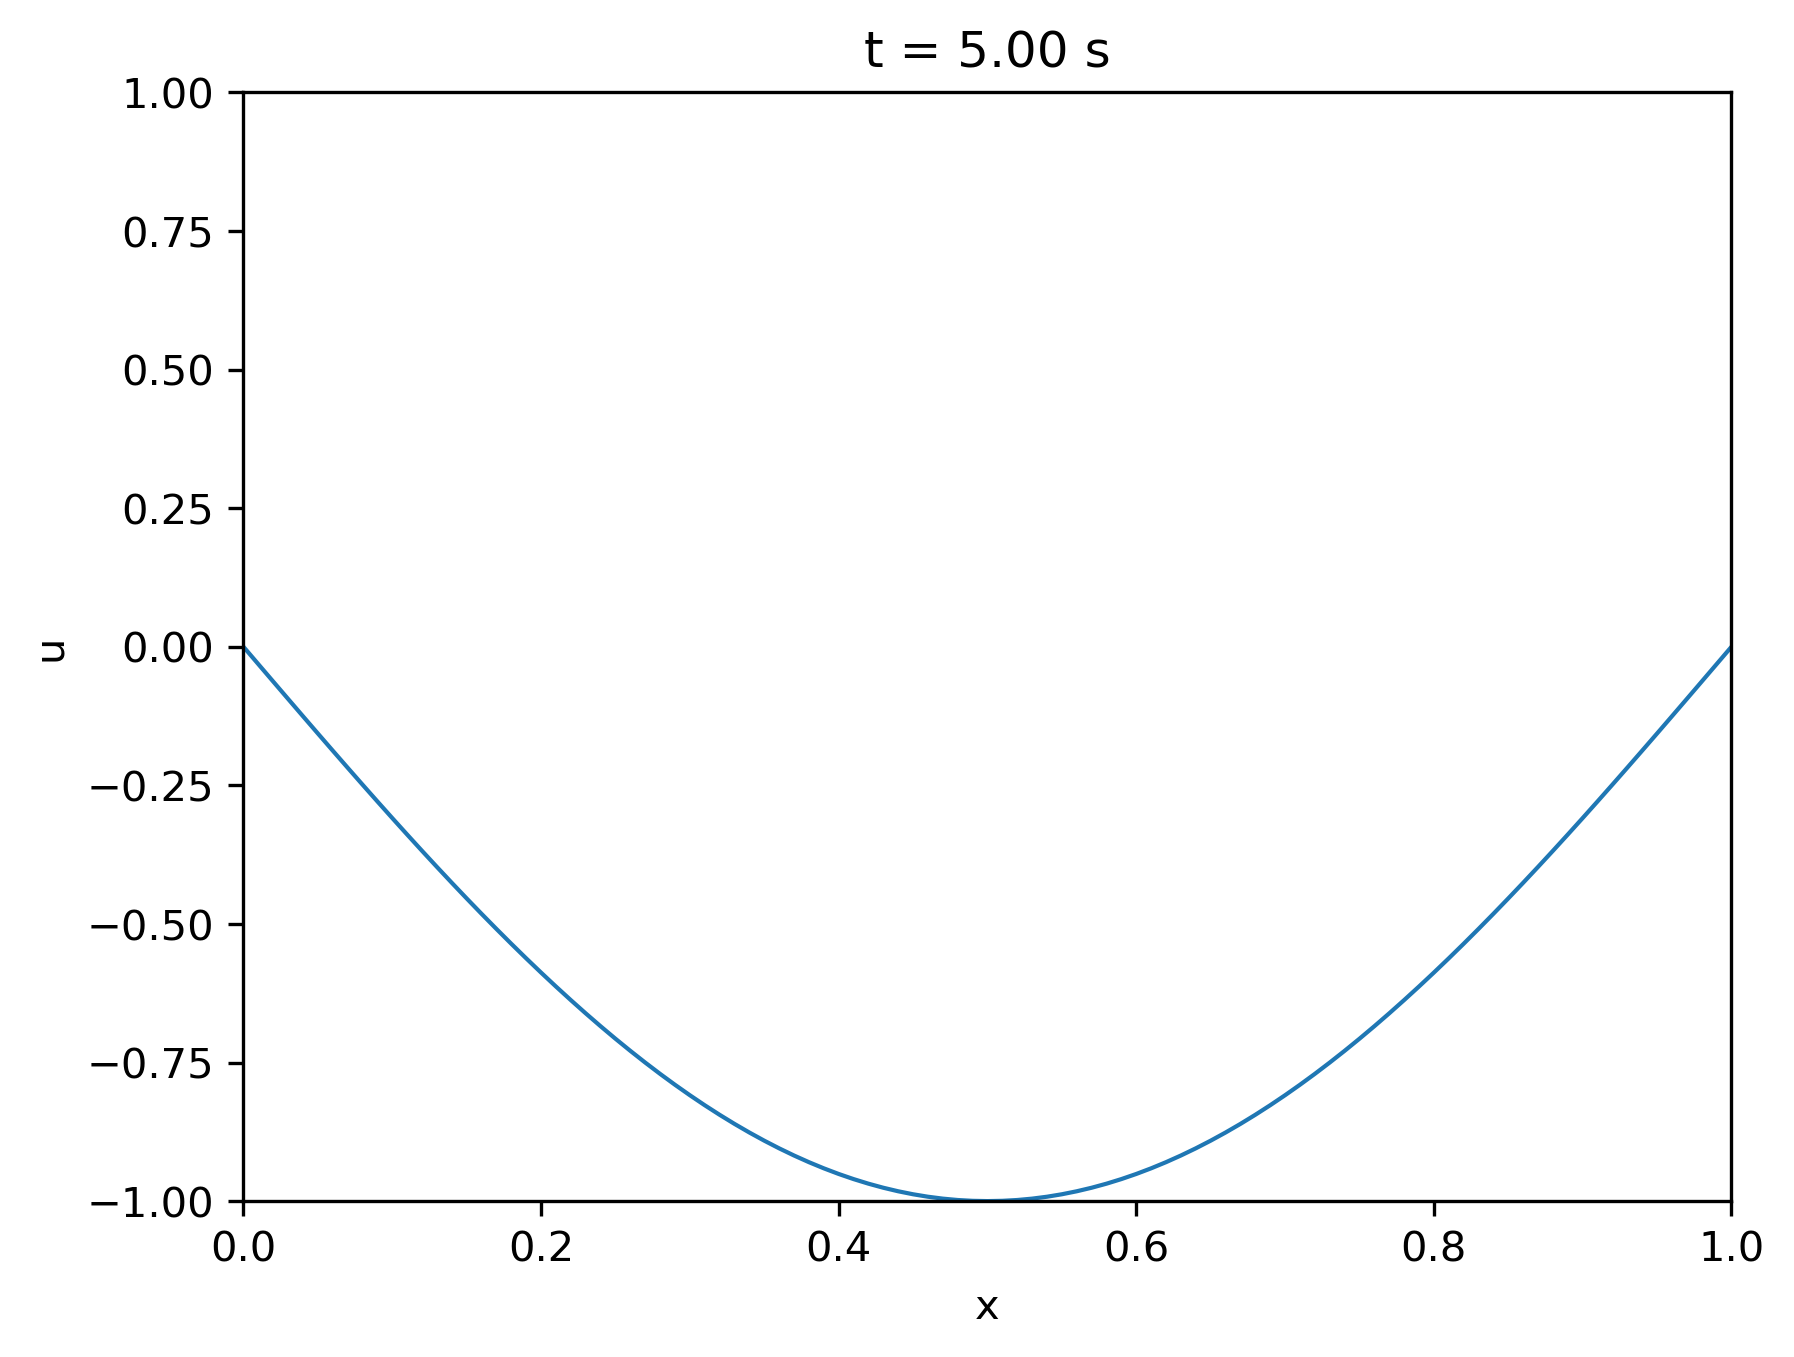

In [3]:
from IPython import display

def animate_1D(u,x,t,interval):
    fig = plt.figure()
    ax = plt.axes(xlim=(0, 1), ylim=(u.min(), u.max()))
    h, = ax.plot(x, u[:,0], lw=1)
    plt.xlabel('x')
    plt.ylabel('u')

    for i in range(len(t)):
        if i % interval == 0:
            h.set_data(x, u[:,i])
            plt.title('t = %0.2f s' % (i*(t[1]-t[0])))
            display.display(plt.gcf())
            display.clear_output(wait =True)

animate_1D(u,x,t, interval=10)

Try solving again with different values $n = 1, 2, 3, 4...$ to see oscillations of different frequencies.

Next switch to Neumann BCs using $n=2$ for the initial condition. Only the last two lines of the loop need to be updated. To enforce $\partial u / \partial x = 0$, we can set `u[0] = u[1]` and `u[-1] = u[-2]`.

In [4]:
u = np.zeros((len(x), len(t)))
u[:,0] = np.sin(2*np.pi*x/L) # initial condition
u[0,0] = u[1,0] # BCs
u[-1,0] = u[-2,0]
    
# first timestep - enforce initial derivative condition
for i in range(1, len(x)-1):
    u[i,1] = u[i,0] - 0.5 * C**2 * (u[i+1,0] - 2*u[i,0] + u[i-1,0])

# explicit solution over all remaining timesteps
for k in range(1, len(t)-1):
    for i in range(1,len(x)-1):
        u[i,k+1] = -u[i,k-1] + 2*u[i,k] + \
                    C**2 * (u[i+1,k] - 2*u[i,k] + u[i-1,k])
    
    u[0,k+1] = u[1,k+1] # BCs
    u[-1,k+1] = u[-2,k+1]

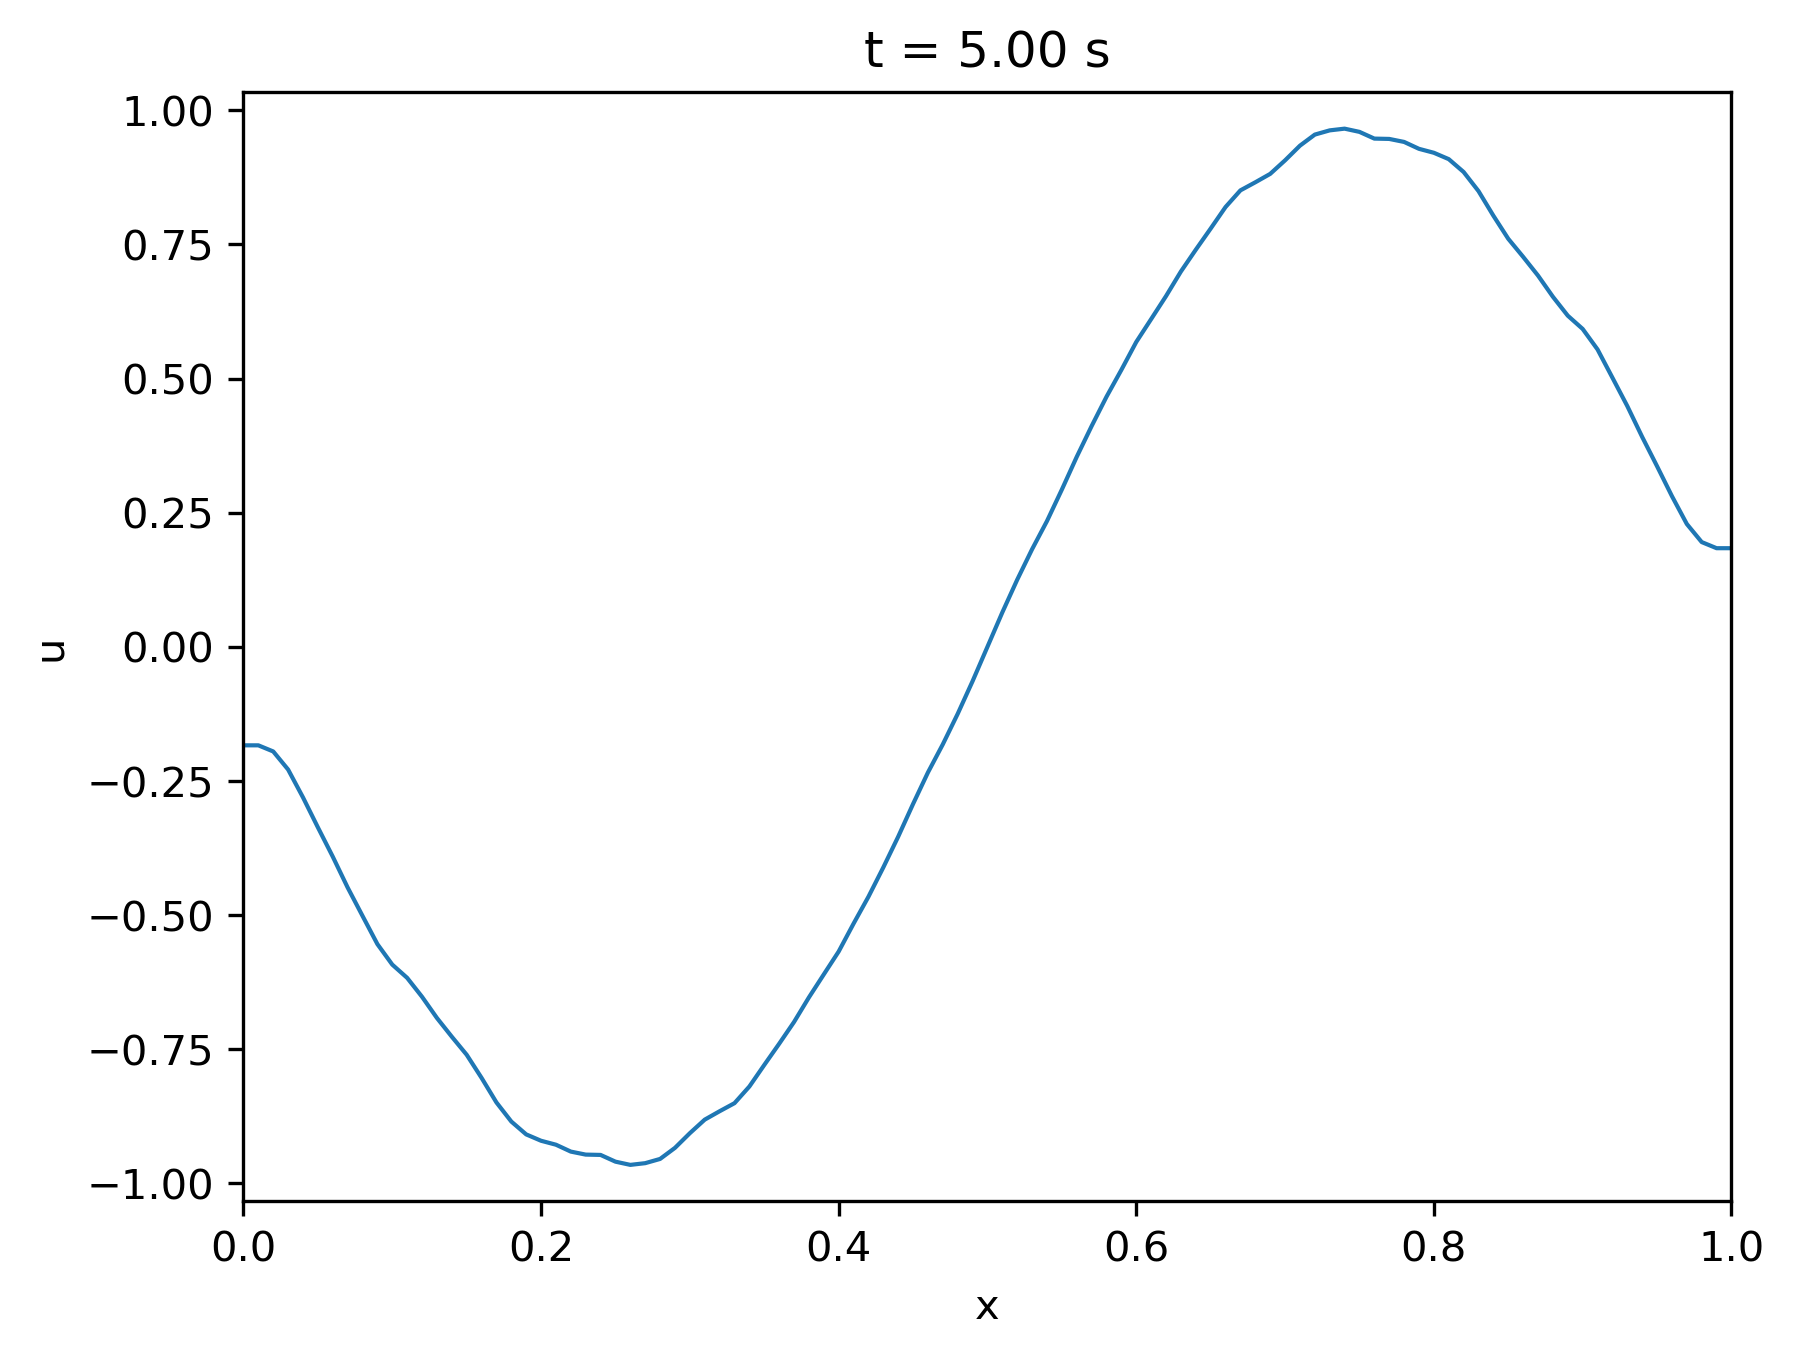

In [5]:
animate_1D(u,x,t, interval=5)

##### 2D Wave Equation

$$\frac{\partial^2 u}{\partial t^2} = c^2 (\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2})$$


$x \in [0,10]$, $y \in [0,10]$, $t \in [0,25]$ seconds. Use $\Delta x = \Delta y = 0.25$ and $\Delta t = 0.1$ s with $c = 1$.

Boundary conditions: $u(0,y,t) = 0$, $u(10,y,t) = 0$, $u(x,0,t) = 0$, $u(x,10,t) = 0$.

Initial conditions: $u(x,y,0) = \exp(-0.5(x-L/2)^2 - 0.5(y-L/2)^2)$

And $\frac{\partial u}{\partial t}(x,y,0) = 0$

This is an explicit solution that stores the full matrix $u(x,y,t)$. At some point this becomes a memory issue, and it would be better to only store the timesteps needed for the next update (`k+1`, `k`, and `k-1`). To improve the runtime, it would also be possible to vectorize the updates, or wrap in a function with a just-in-time compiler like [Numba](https://numba.pydata.org/).

In [6]:
dx = 0.25 # = dy
dt = 0.1 # s
L = 10 # m
tmax = 25 # s
c = 1
C = c*dt/dx
print(C**2 + C**2) # stability condition <= 1

x = np.arange(0, L+dx, dx)
y = np.arange(0, L+dx, dx)
X,Y =np.meshgrid(x,y)
t = np.arange(0, tmax+dt, dt)

u = np.zeros((len(x), len(x), len(t)))

# initial condition
u[:,:,0] = np.exp(-0.5*(X-L/2.0)**2 - 0.5*(Y-L/2.0)**2)

# first timestep - zero velocity condition
for i in range(1, len(x)-1):
    for j in range(1, len(y)-1):
        u[i,j,1] = u[i,j,0] - 0.5 * C**2 * (u[i+1,j,0] - 4*u[i,j,0] + u[i-1,j,0] + u[i,j+1,0] + u[i,j-1,0])

# explicit solution over all remaining timesteps
for k in range(1, len(t)-1):
    for i in range(1,len(x)-1):
        for j in range(1,len(y)-1):
            u[i,j,k+1] = -u[i,j,k-1] + 2*u[i,j,k] + \
                        C**2 * (u[i+1,j,k] - 4*u[i,j,k] + u[i-1,j,k] + \
                                u[i,j+1,k] + u[i,j-1,k])
    
    # BCs=0 should still be met, but assign anyway
    u[0,:,k+1] = 0
    u[-1,:,k+1] = 0
    u[:,0,k+1] = 0
    u[:,-1,k+1] = 0

0.32000000000000006


We will need a new animation function for the 2D case. Update the plot every `interval` steps using the `plot_surface` function that we saw in Lecture 17 for the 2D Laplace equation.

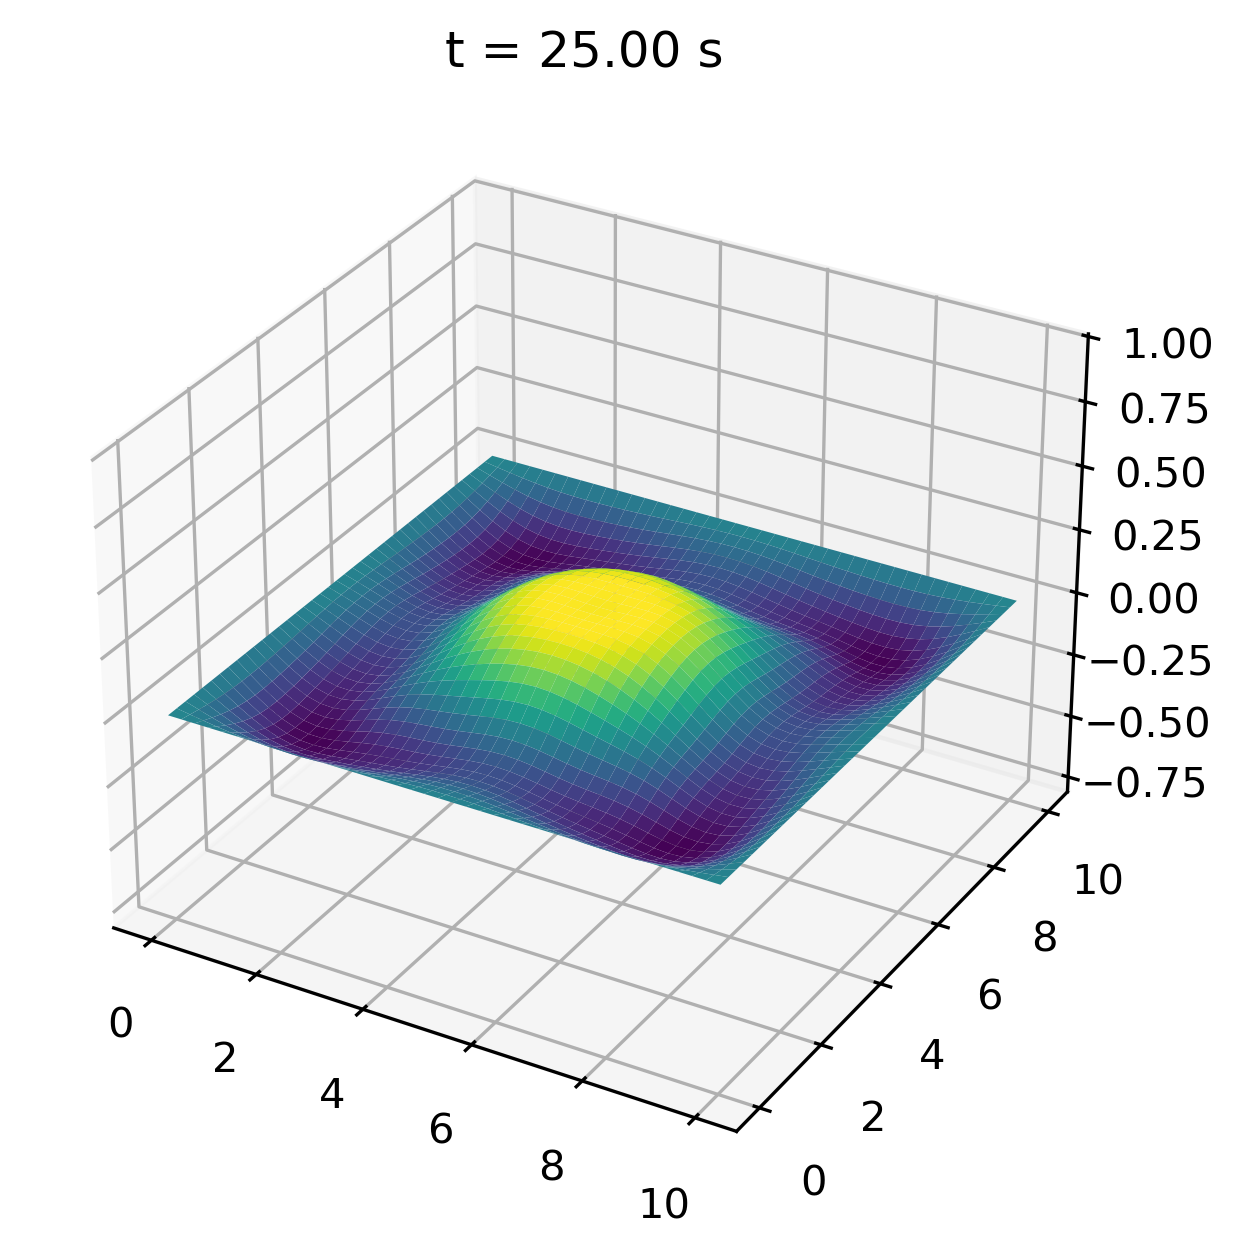

In [7]:
def animate_2D(u,x,y,t,interval):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    X,Y = np.meshgrid(x,y)
    h = ax.plot_surface(X, Y, u[:,:,0], cmap='viridis')
    ax.set_zlim([u.min(), u.max()])
    
    for i in range(len(t)):
        if i % interval == 0:
            ax.collections[-1].remove()
            h = ax.plot_surface(X, Y, u[:,:,i], cmap='viridis')
            plt.title('t = %0.2f s' % (i*(t[1]-t[0])))
            display.display(plt.gcf())
            display.clear_output(wait=True)

animate_2D(u,x,y,t, interval=2)

2D solution with BCs changed to derivative = 0.

In [8]:
u = np.zeros((len(x), len(y), len(t)))

# initial condition
u[:,:,0] = np.exp(-0.5*(X-L/2.0)**2 - 0.5*(Y-L/2.0)**2)

# first timestep - zero velocity condition
for i in range(1, len(x)-1):
    for j in range(1, len(y)-1):
        u[i,j,1] = u[i,j,0] - 0.5 * C**2 * (u[i+1,j,0] - 4*u[i,j,0] + u[i-1,j,0] + u[i,j+1,0] + u[i,j-1,0])

# explicit solution over all remaining timesteps
for k in range(1, len(t)-1):
    for i in range(1,len(x)-1):
        for j in range(1,len(y)-1):
            u[i,j,k+1] = -u[i,j,k-1] + 2*u[i,j,k] + \
                        C**2 * (u[i+1,j,k] - 4*u[i,j,k] + \
                                u[i-1,j,k] + u[i,j+1,k] + u[i,j-1,k])
    
    u[0,:,k+1] = u[1,:,k+1]
    u[-1,:,k+1] = u[-2,:,k+1]
    u[:,0,k+1] = u[:,1,k+1]
    u[:,-1,k+1] = u[:,-2,k+1]

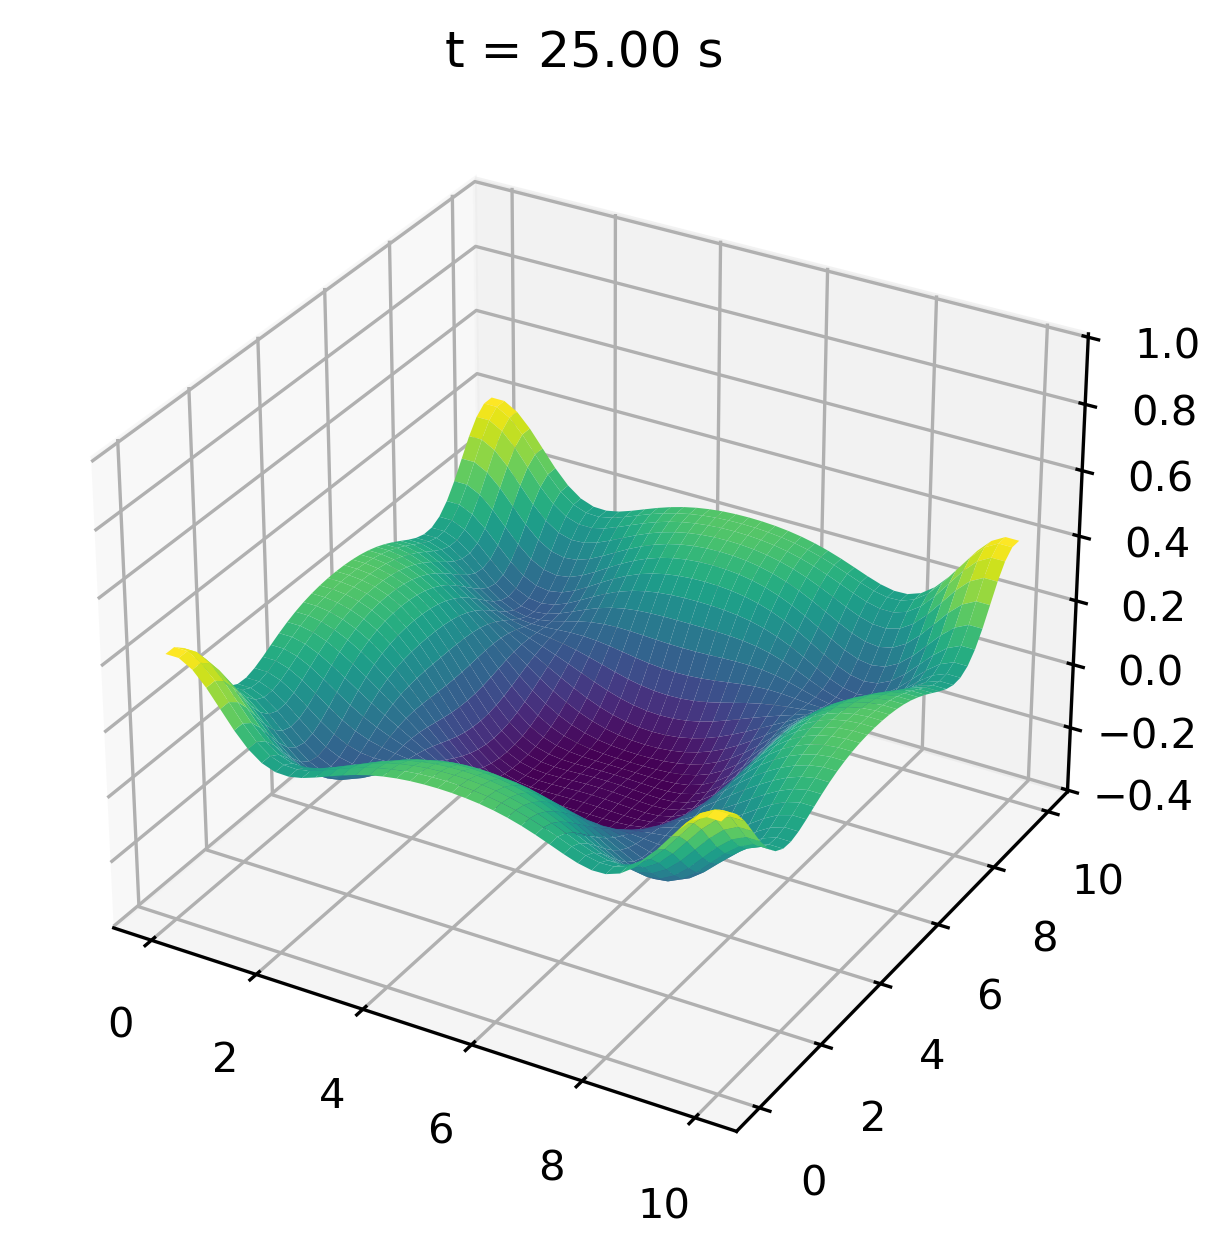

In [9]:
animate_2D(u,x,x,t, interval=2)